In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns; sns.set_theme()

In [2]:
# set the figure size
plt.rcParams['figure.figsize'] = [20, 20]

In [3]:
agentNum = 100

In [16]:
infectedList = np.zeros(agentNum)

# SEIR model
susceptState = np.ones(agentNum)
exposedState = np.zeros(agentNum)
infectState = np.zeros(agentNum)
recoverState = np.zeros(agentNum)

In [5]:
# time for E to I, this stage will 
susceptList = np.random.lognormal(mean=4.5, sigma=1.5, size=agentNum)

# time for I to symptom
symptomList = np.random.lognormal(mean=1.1, sigma=0.9, size=agentNum)

In [6]:
contactNetwork = np.random.normal(size=(agentNum, agentNum))

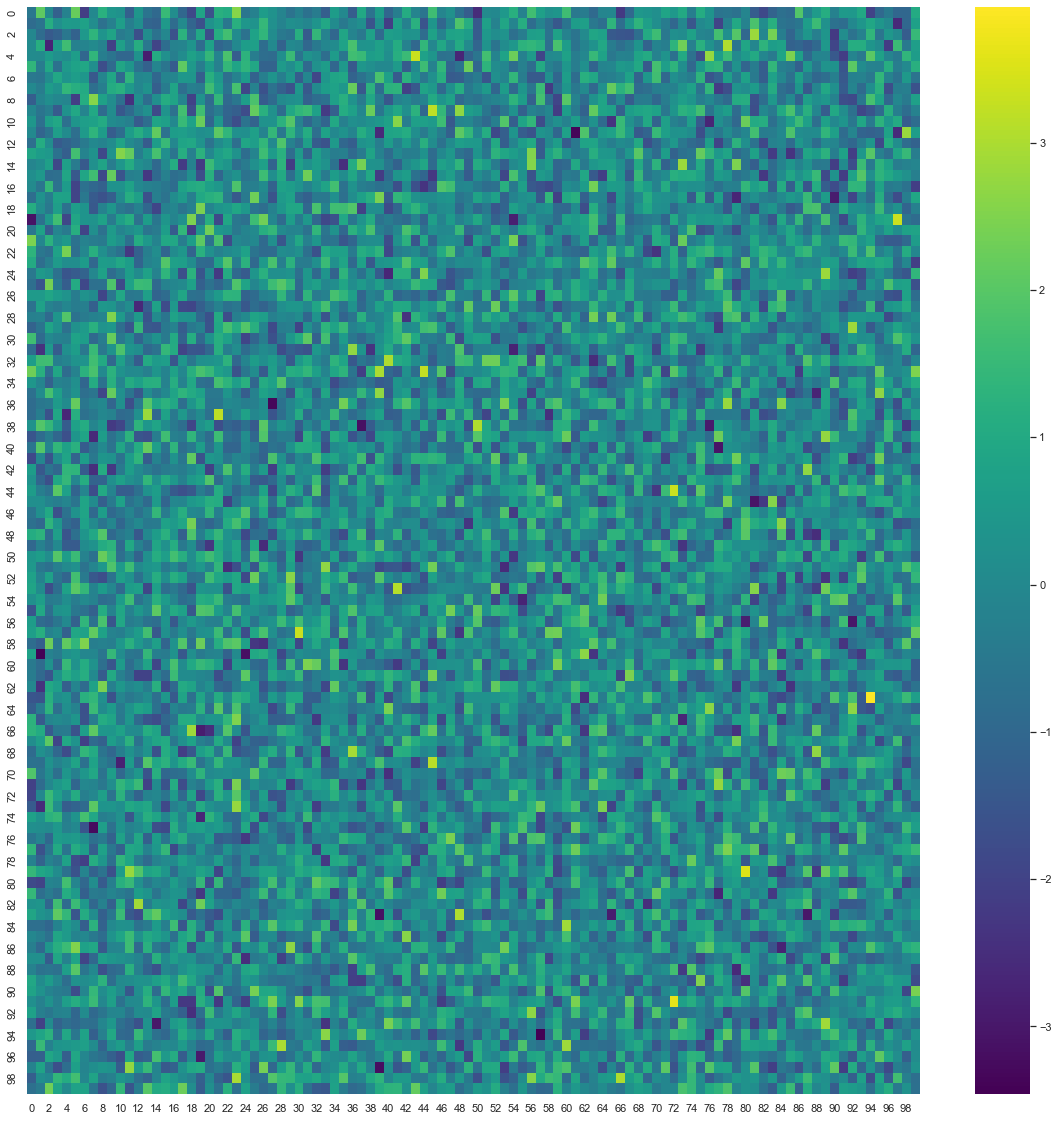

In [7]:
fig, axs = plt.subplots()
ax = sns.heatmap(contactNetwork,
                 linewidths=0.001,
                 cmap="viridis")

(array([99.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.74907261e+00, 3.40042858e+03, 6.79710808e+03, 1.01937876e+04,
        1.35904671e+04, 1.69871466e+04, 2.03838261e+04, 2.37805056e+04,
        2.71771851e+04, 3.05738646e+04, 3.39705441e+04]),
 <BarContainer object of 10 artists>)

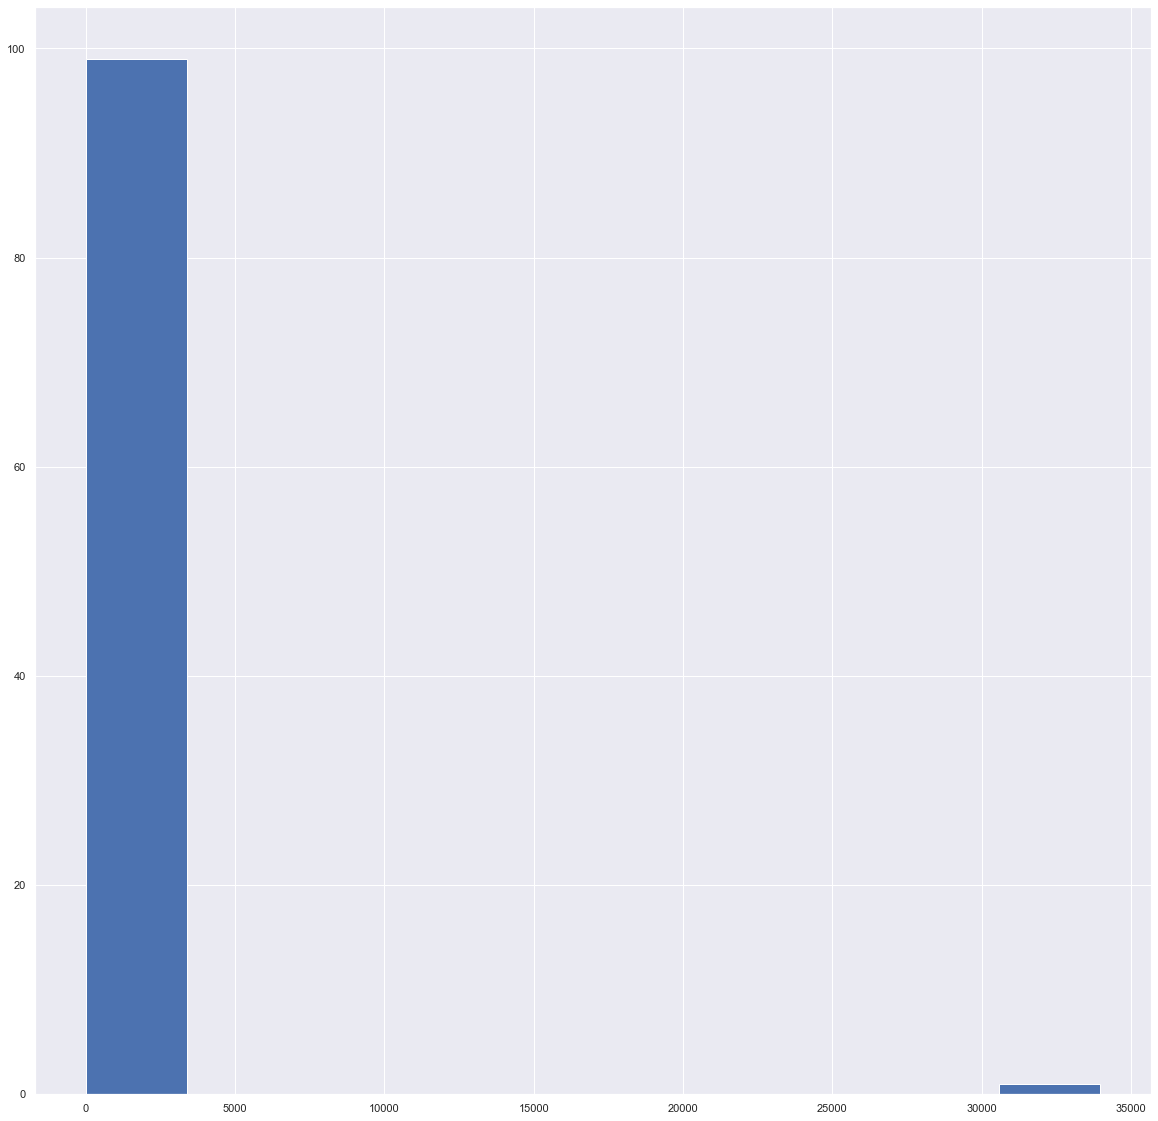

In [8]:
fig, axs = plt.subplots()
axs.hist(susceptList)

In [9]:
networkSym = contactNetwork.copy()


In [10]:
for i in range(networkSym.shape[0]):
    for j in range(i, networkSym.shape[1]):
        if networkSym[j][i] < 0:
            networkSym[j][i] = -networkSym[j][i]
        networkSym[i][j] = networkSym[j][i]

        if i == j :
            networkSym[i][j] = 0

In [11]:
np.min(networkSym)

0.0

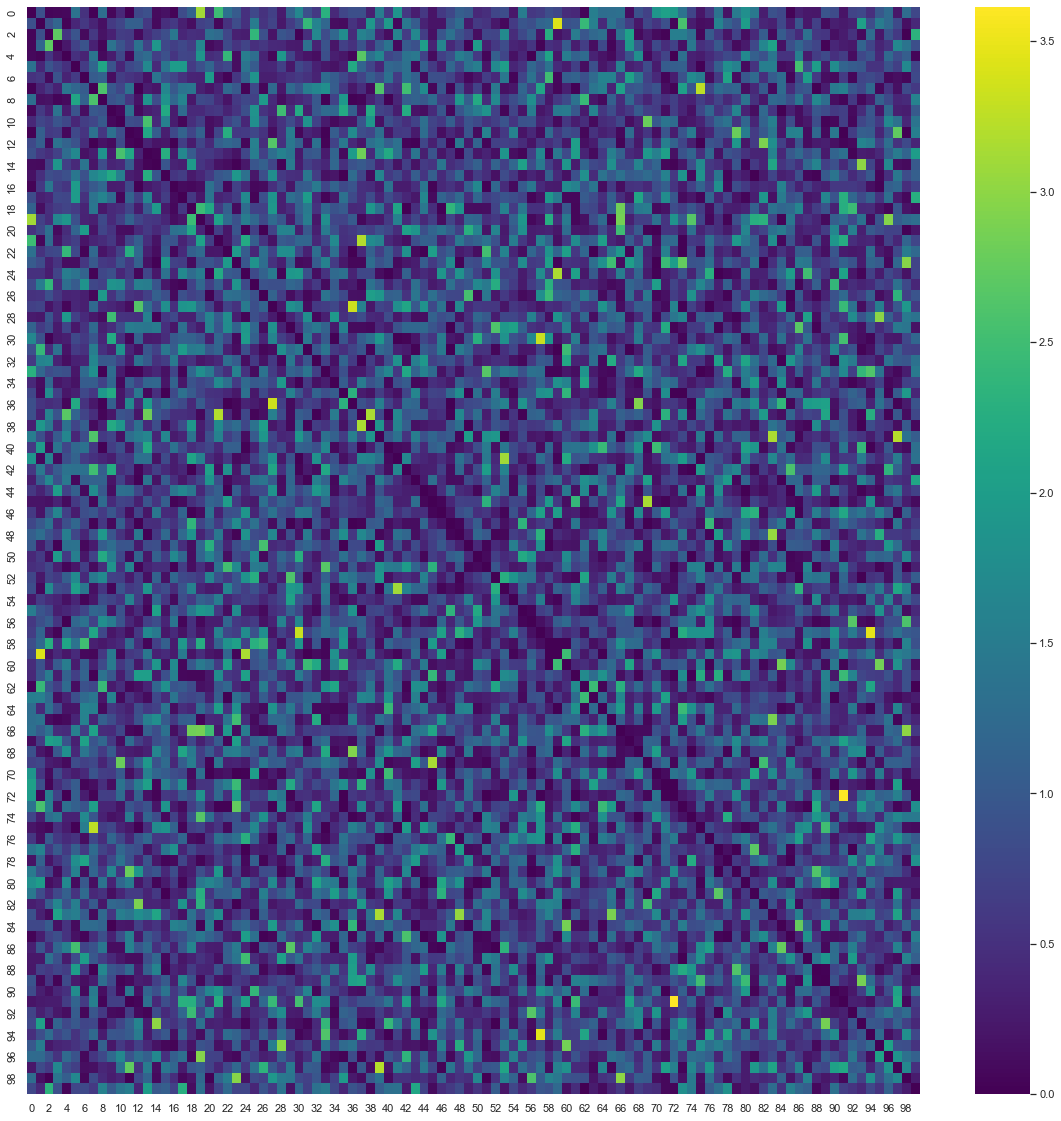

In [12]:
fig, axs = plt.subplots() # change the contact network to symmetry
ax = sns.heatmap(networkSym,
#                  linewidths=0.001,
                 cmap="viridis")

/Users/jiabaoli/opt/anaconda3/envs/myRenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

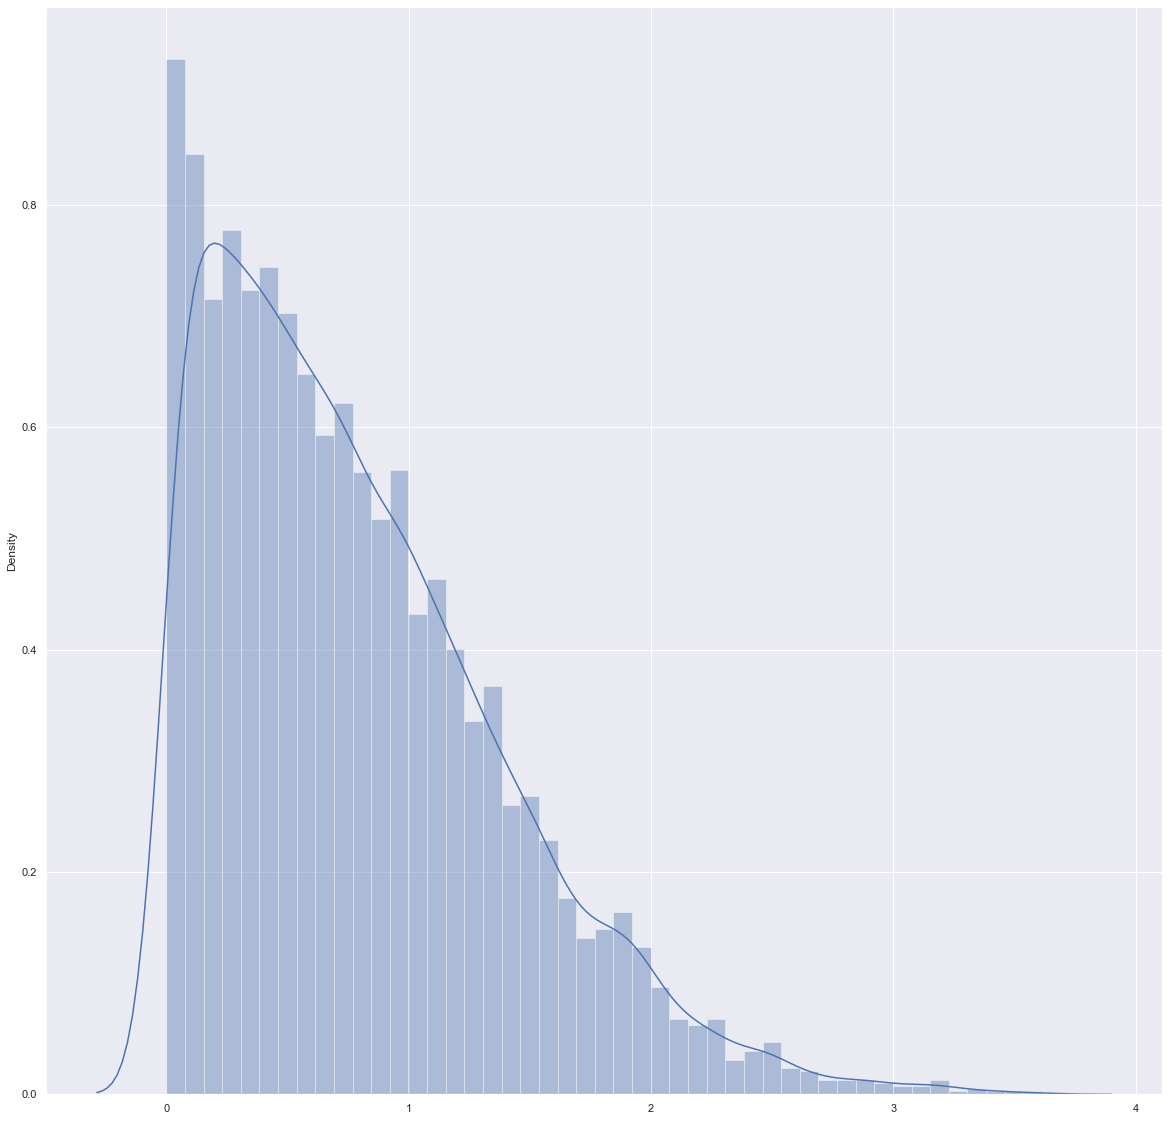

In [27]:
sns.distplot(networkSym)

/Users/jiabaoli/opt/anaconda3/envs/myRenv/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/jiabaoli/opt/anaconda3/envs/myRenv/lib/python3.8/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


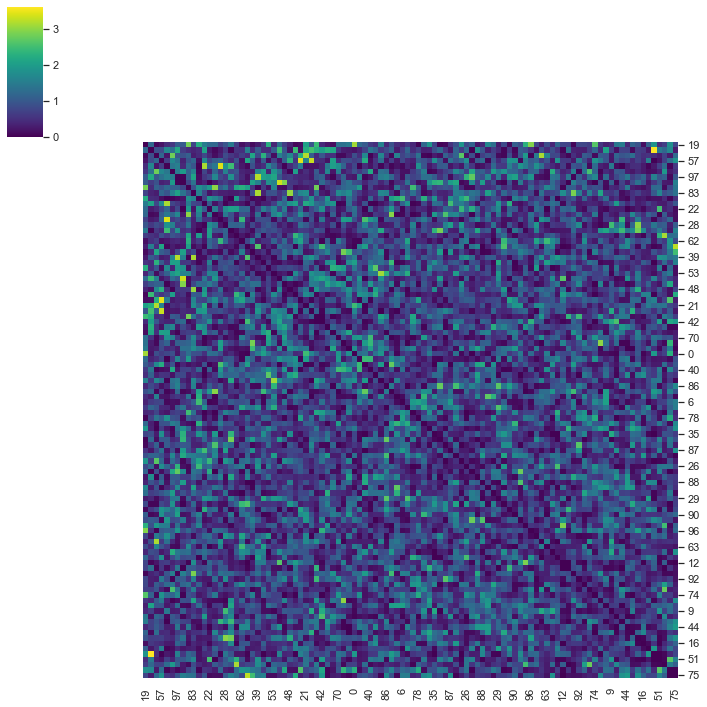

In [15]:
cg = sns.clustermap(networkSym,
#                row_cluster=False,
#                col_cluster=False,
#                  linewidths=0.001,
                 cmap="viridis")
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
# the cbar position can be moved to other places

In [22]:
# for time = t, check whether the agents have contact or not

myTime = 1
# at the begining we will assign the number of E patient
susceptState[0] = 0
exposedState[0] = 1
# infectState
# recoverState

susNumRatio = np.sum(susceptState)
expNumRatio = np.sum(exposedState)
infNumRatio = np.sum(infectState)
recNumRatio = np.sum(recoverState)
susRatio = susNumRatio/agentNum
expRatio = expNumRatio/agentNum
infRatio = infNumRatio/agentNum
recRatio = recNumRatio/agentNum

header = 'Time: '+str(myTime) + '\n' + '\t'.join(['susNumRatio', 'expNumRatio', 'infNumRatio', 'recNumRatio'])
prtStr = '\t'.join([str(i) for i in [susNumRatio, expNumRatio, infNumRatio, recNumRatio]])
prtStr2 = '\t'.join([str(i) for i in [susRatio, expRatio, infRatio, recRatio]])

print('\n'.join([header, prtStr, prtStr2]))

Time: 1
susNumRatio	expNumRatio	infNumRatio	recNumRatio
99.0	1.0	0.0	0.0
0.99	0.01	0.0	0.0


In [42]:
expIndex

array([0])

In [34]:
# begin contact, all people contact together
contactCount = 0
s2eRatio = 0.016 # beta value for S to E

susIndex = np.where(susceptState==1)[0]
expIndex = np.where(exposedState==1)[0]
infIndex = np.where(infectState==1)[0]
recIndex = np.where(recoverState==1)[0]

myTime = myTime + 1
# update E to I
for i in expIndex:
    if myTime >= susceptList[i]:
        exposedState[i] = 0
        infectState[i] = 0
        
        # record the expose time and E -> I
        
        
        
        
for i in range(agentNum):
    for j in range(i, agentNum):
        
        
        
        
        contactProbability = networkSym[i,j]
        if contactProbability > 1 :
            contactProbability = 1
        
        # print(contactProbability)
        if np.random.binomial(1,contactProbability):
            contactCount = contactCount + 1
            # print(str(i) + ' and ' + str(j) + ' contacts')
            
            
            
        else:
            contactCount = contactCount
            # print(str(i) + ' and ' + str(j) + ' not contacts')

print('Total number of contacts is ' + str(contactCount))
# the contact is important, that is the reason why we will record it

susNumRatio = np.sum(susceptState)
expNumRatio = np.sum(exposedState)
infNumRatio = np.sum(infectState)
recNumRatio = np.sum(recoverState)
susRatio = susNumRatio/agentNum
expRatio = expNumRatio/agentNum
infRatio = infNumRatio/agentNum
recRatio = recNumRatio/agentNum

header = 'Time: '+str(myTime) + '\n' + '\t'.join(['susNumRatio', 'expNumRatio', 'infNumRatio', 'recNumRatio'])
prtStr = '\t'.join([str(i) for i in [susNumRatio, expNumRatio, infNumRatio, recNumRatio]])
prtStr2 = '\t'.join([str(i) for i in [susRatio, expRatio, infRatio, recRatio]])

print('\n'.join([header, prtStr, prtStr2]))


Total number of contacts is 3139


In [24]:
# begin contact, to speed up, only E and R will contact, others we don't care
contactCount = 0

currentEList = [] # will be updated in next version
for i in currentEList:
    for j in range(agentNum):
        
        
        contactProbability = networkSym[i,j]
        if contactProbability > 1 :
            contactProbability = 1
        
        # print(contactProbability)
        if np.random.binomial(1,contactProbability):
            contactCount = contactCount + 1
            # print(str(i) + ' and ' + str(j) + ' contacts')

        else:
            contactCount = contactCount
            # print(str(i) + ' and ' + str(j) + ' not contacts')

print('Total number of contacts is ' + str(contactCount))


0

In [7]:
myTime=[i for i in range(100)] 
susRatio=[i/100 for i in range(100)]
exposeRatio=[i/100 for i in range(100)] 
infecRatio=[i/100 for i in range(100)] 
recoverRatio=[i/100 for i in range(100)] 
interactionRatio=[i/100 for i in range(100)] 

In [21]:
t = 0